In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('newborn_health_monitoring_with_risk.csv')

df.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,12/10/24,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,12/11/24,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,12/12/24,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,12/13/24,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,12/14/24,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [3]:
#binarize feeding column (3 categories)
feeding_dummies = pd.get_dummies(df['feeding_type'], prefix='feeding')
df = pd.concat([df, feeding_dummies], axis=1)

#binarize gender, immunization, reflexes (2 catgories )
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['immunizations_done'] = df['immunizations_done'].map({'Yes': 1, 'No': 0})
df['reflexes_normal'] = df['reflexes_normal'].map({'Yes': 1, 'No': 0})

#binarize gestational age (full term 39 weeks)
df['gestational_age_bin'] = df['gestational_age_weeks'].apply(lambda x: 1 if x >= 39 else 0)
print(df[['gestational_age_weeks', 'gestational_age_bin']].head(10))
print(df['gestational_age_bin'].value_counts())

df.head()

   gestational_age_weeks  gestational_age_bin
0                   40.2                    1
1                   40.2                    1
2                   40.2                    1
3                   40.2                    1
4                   40.2                    1
5                   40.2                    1
6                   40.2                    1
7                   40.2                    1
8                   40.2                    1
9                   40.2                    1
gestational_age_bin
0    1650
1    1350
Name: count, dtype: int64


,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_Breastfeeding,feeding_Formula,feeding_Mixed,gestational_age_bin
0,B001,Sara,0,40.2,3.3,50.0,31.9,12/10/24,1,3.28,...,0,4.2,7.0,1,1,At Risk,False,True,False,1
1,B001,Sara,0,40.2,3.3,50.0,31.9,12/11/24,2,3.35,...,2,10.6,NaN,0,0,At Risk,False,True,False,1
2,B001,Sara,0,40.2,3.3,50.0,31.9,12/12/24,3,3.35,...,5,9.8,NaN,0,0,Healthy,True,False,False,1
3,B001,Sara,0,40.2,3.3,50.0,31.9,12/13/24,4,3.48,...,4,8.1,NaN,0,1,Healthy,False,False,True,1
4,B001,Sara,0,40.2,3.3,50.0,31.9,12/14/24,5,3.50,...,1,11.6,NaN,0,1,At Risk,True,False,False,1


   apgar_score  apgar_present
0          7.0              1
1          NaN              0
2          NaN              0
3          NaN              0
4          NaN              0
5          NaN              0
6          NaN              0
7          NaN              0
8          NaN              0
9          NaN              0


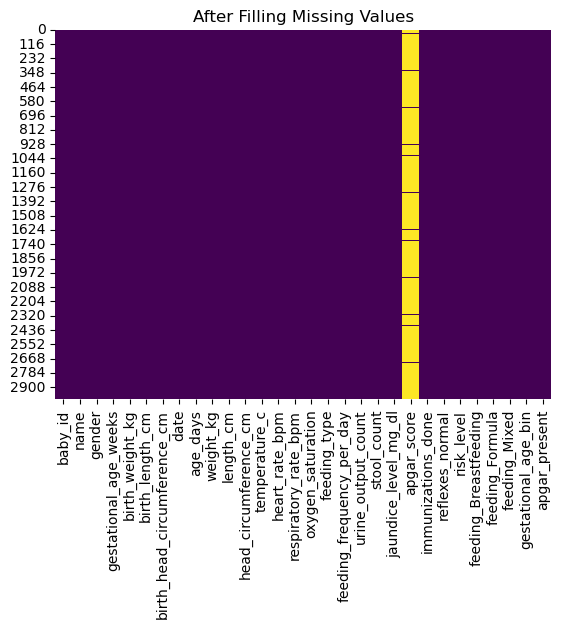

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_Breastfeeding,feeding_Formula,feeding_Mixed,gestational_age_bin,apgar_present
0,B001,Sara,0,40.2,3.3,50.0,31.9,12/10/24,1,3.28,...,4.2,7.0,1,1,At Risk,False,True,False,1,1
1,B001,Sara,0,40.2,3.3,50.0,31.9,12/11/24,2,3.35,...,10.6,NaN,0,0,At Risk,False,True,False,1,0
2,B001,Sara,0,40.2,3.3,50.0,31.9,12/12/24,3,3.35,...,9.8,NaN,0,0,Healthy,True,False,False,1,0
3,B001,Sara,0,40.2,3.3,50.0,31.9,12/13/24,4,3.48,...,8.1,NaN,0,1,Healthy,False,False,True,1,0
4,B001,Sara,0,40.2,3.3,50.0,31.9,12/14/24,5,3.50,...,11.6,NaN,0,1,At Risk,True,False,False,1,0


In [4]:
df['apgar_present'] = (df['apgar_score'].notnull().astype(int))
print(df[['apgar_score', 'apgar_present']].head(10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('After Filling Missing Values')
plt.show()
df.head()

In [5]:
df['apgar_score'].count()

np.int64(100)

In [6]:
from sklearn.model_selection import train_test_split

y = df['risk_level']
columns_to_drop = [ 'baby_id', 'name', 'birth_weight_kg', 'birth_length_cm', 'birth_head_circumference_cm', 'date', 'risk_level', 'apgar_score','jaundice_level_mg_dl', 'apgar_present']
X = df.drop(columns=columns_to_drop)

X = pd.get_dummies(X, drop_first=True)

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

baby_risk = df.groupby('baby_id')['risk_level'].first()
unique_babies = df['baby_id'].unique()
baby_risks = baby_risk.values 

# Split unique baby IDs into 70% train, 15% val, 15% test
train_ids, temp_ids = train_test_split(unique_babies, test_size=0.3, random_state=42, stratify=baby_risks)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42, stratify=baby_risk[temp_ids])

X_train = X[df['baby_id'].isin(train_ids)]
y_train = y[df['baby_id'].isin(train_ids)]

X_val = X[df['baby_id'].isin(val_ids)]
y_val = y[df['baby_id'].isin(val_ids)]

X_test = X[df['baby_id'].isin(test_ids)]
y_test = y[df['baby_id'].isin(test_ids)]

# Confirm shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)
print("Train:", len(X_train)/len(X), "Validation:", len(X_val)/len(X), "Test:", len(X_test)/len(X))

Original X shape: (3000, 21)
Original y shape: (3000,)
Shape of X_train: (2100, 21)
Shape of X_val: (450, 21)
Shape of X_test: (450, 21)
Shape of y_train: (2100,)
Shape of y_val: (450,)
Shape of y_test: (450,)
Train: 0.7 Validation: 0.15 Test: 0.15


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score, pos_label='At Risk')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced') # classes are imbalanced

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,          # 5-fold cross-validation
    scoring=recall_scorer,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.9678571428571427


In [14]:
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)

rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [15]:
y_val_pred = rf_final.predict(X_val)

print("VALIDATION RESULTS")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

VALIDATION RESULTS
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

     At Risk       0.62      0.98      0.76        57
     Healthy       1.00      0.91      0.95       393

    accuracy                           0.92       450
   macro avg       0.81      0.95      0.85       450
weighted avg       0.95      0.92      0.93       450


Confusion Matrix:
 [[ 56   1]
 [ 35 358]]


In [16]:
cm = confusion_matrix(y_val, y_val_pred)
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TPR_FPR = TPR/FPR

print("TPR:", TPR)
print("FPR:", FPR)
print("TPR/FPR:", TPR_FPR)

TPR: 0.910941475826972
FPR: 0.017543859649122806
TPR/FPR: 51.92366412213741


In [17]:
y_test_pred = rf_final.predict(X_test)

print("TEST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTPR/FPR:", TPR_FPR)

TEST RESULTS
Accuracy: 0.9244444444444444

Classification Report:
               precision    recall  f1-score   support

     At Risk       0.64      0.98      0.78        60
     Healthy       1.00      0.92      0.95       390

    accuracy                           0.92       450
   macro avg       0.82      0.95      0.87       450
weighted avg       0.95      0.92      0.93       450


Confusion Matrix:
 [[ 59   1]
 [ 33 357]]

TPR/FPR: 51.92366412213741


In [18]:
cm = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TPR_FPR = TPR/FPR

print("TPR:", TPR)
print("FPR:", FPR)
print("TPR/FPR:", TPR_FPR)

TPR: 0.9153846153846154
FPR: 0.016666666666666666
TPR/FPR: 54.92307692307692


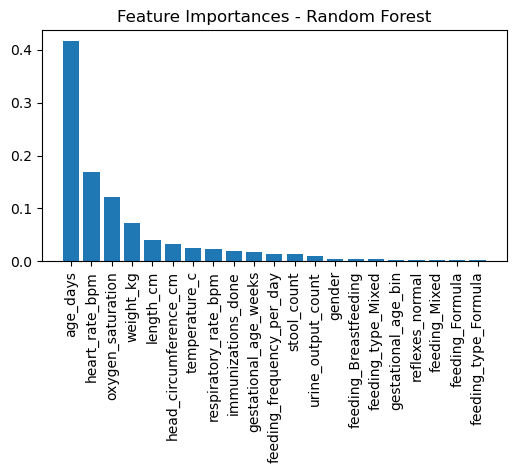

In [23]:
#which features are most important 
importances = rf_final.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,3))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.title("Feature Importances - Random Forest")
plt.show()
